# Introduction  

This challenge is the **capstone project** of **Summer Analytics**, a primer course on Data Science, conducted by the **Consulting and Analytics Club of IIT Guwahati** during the summers.  

The dataset is provided by **DeltaX**, a pioneering cross-channel digital advertising platform. The cloud-based platform leverages **big data, user behavior, and machine learning algorithms** to improve performance across the business funnel of advertisers.  


# Problem Statement  

Let's take a case where an advertiser on the platform (**DeltaX**) would like to estimate the performance of their campaign in the future.  

Imagine it is the **first day of March**, and you are given the past performance data of ads from **August 1st to February 28th**.  

Your task is to **predict an ad's future performance (revenue) between March 1st and March 15th**.  

Well, it is now time for you to put on your **problem-solving hats** and start playing with the data provided under the "data" section. 🚀  


# Loading Libraries

In [2]:
# Importing Basic libraries to play with data and to construct EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Libraries to make a Model for the data
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# For plotting the regression tree
from IPython.display import Image
import pydotplus

# To remove warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Reading Data

In [3]:
data_train=pd.read_csv('Train_Data.csv')

In [4]:
data_test=pd.read_csv('Test_Data.csv')

In [5]:
data_train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [6]:
data_test.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


# Data Description

## Features  
- **date** : The date on which the ad was made live  
- **campaign** : Campaign number  
- **adgroup** : Ad group number  
- **ad** : Ad number  
- **impressions** : Number of times the ad was shown  
- **clicks** : Number of times the ad was clicked  
- **cost** : Amount spent to show the ad  
- **conversions** : Number of transactions received  
- **revenue** : Revenue generated from the ad  

## Goal  
Our goal is to predict the **revenue** from the test data while minimizing the **Root Mean Squared Error (RMSE)**.


# File Structure and Content

In [7]:
print("Row: ", data_train.shape[0])
print("Col: ", data_train.shape[1])

Row:  4571
Col:  9


In [8]:
print("Row: ", data_test.shape[0])
print("Col: ", data_test.shape[1])

Row:  318
Col:  8


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [10]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         318 non-null    object 
 1   campaign     318 non-null    object 
 2   adgroup      318 non-null    object 
 3   ad           318 non-null    object 
 4   cost         318 non-null    float64
 5   impressions  318 non-null    int64  
 6   clicks       318 non-null    int64  
 7   conversions  318 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 20.0+ KB


#Summary:

The data_train data have 4571 rows and 9 columns.
The data_test data have 318 rows and 8 columns.
There are no missing data in both data_train and data_test.

# Exploratory Data Analysis(EDA)

In [11]:
data_train.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


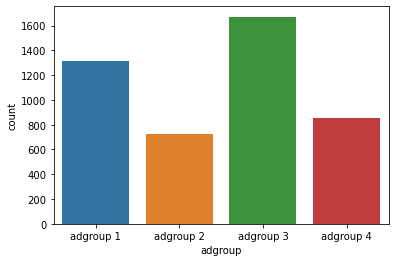

In [12]:
sns.countplot("adgroup", data = data_train);

There are 4 adgroups in adgroup column which will be converted into numerical variable by creating dummy variable.

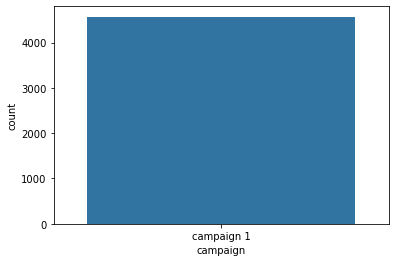

In [13]:
sns.countplot("campaign", data = data_train);

We can see that there is only 1 campaign. So taking campaign column into consideration is meaningless.

In [14]:
data_train["ad"].value_counts().sort_values()

ad 51      3
ad 69      4
ad 36      4
ad 47      4
ad 24      4
        ... 
ad 32    377
ad 7     461
ad 2     512
ad 1     587
ad 3     617
Name: ad, Length: 70, dtype: int64

There are 70 types of ads in ad column in data_train.

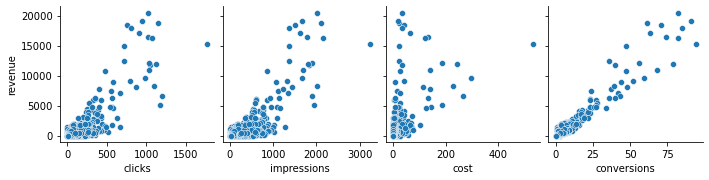

In [15]:
#variation of revenue with each numerical column
sns.pairplot(data_train, y_vars=["revenue"], x_vars=["clicks", "impressions", "cost", "conversions"])
plt.show()

The relationships between variables do not appear to be strictly linear.

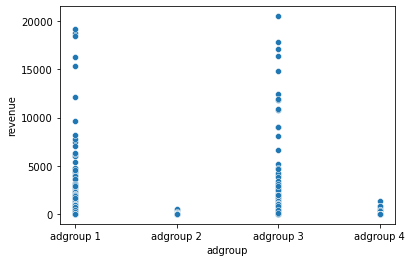

In [16]:
sns.scatterplot(x = "adgroup", y = "revenue", data = data_train);

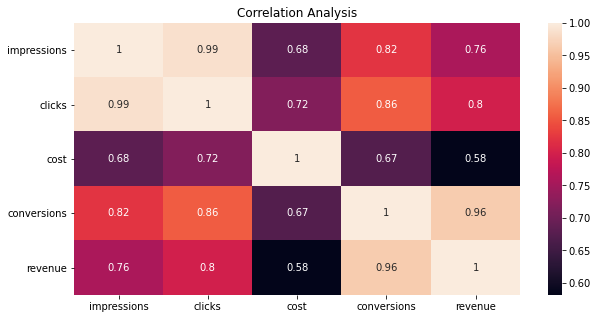

In [17]:
plt.figure(figsize=(10, 5))
plt.title("Correlation Analysis")
sns.heatmap(data_train.corr(), annot = True);

- The variable **conversion** is highly **positively correlated** with our target variable **revenue**.  
- The variable **cost** has the **least positive correlation** with revenue.  
- There is only a **positive relationship** between the variables in our dataset.  

<AxesSubplot:ylabel='revenue'>

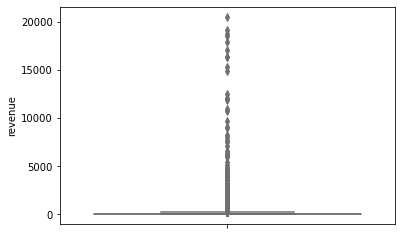

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=data_train["revenue"], color="skyblue")

There are outliers above upper whisker.To make skewed distribution normal let us apply log transformation

<AxesSubplot:ylabel='log_revenue'>

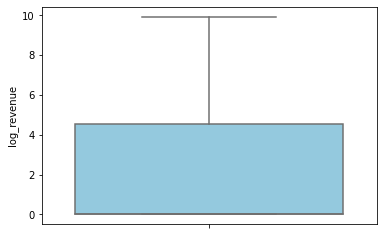

In [19]:
data_train["log_revenue"] = np.log1p(data_train["revenue"])  # log1p handles zero values well

plt.figure(figsize=(6, 4))
sns.boxplot(y=data_train["log_revenue"], color="skyblue")


# Adding Features

In [20]:
def Add(x):
    x["CTR"] = x["clicks"] / x["impressions"]
    x["CPC"] = x["cost"] / x["clicks"]
    x["CPA"] = x["cost"] / x["conversions"]
    return x

Add(data_train)
Add(data_test)
data_train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,log_revenue,CTR,CPC,CPA
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,0.000000,0.250000,0.013333,inf
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,0.000000,NaN,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,0.000000,0.307692,0.010000,inf
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,0.000000,0.800000,0.020000,inf
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,6.831641,0.510121,0.010238,0.3225


In [21]:
data_train = data_train.replace(np.inf, np.nan)
data_train = data_train.fillna(0)
data_test = data_test.replace(np.inf, np.nan)
data_test = data_test.fillna(0)

In [22]:
data_train.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
log_revenue    0
CTR            0
CPC            0
CPA            0
dtype: int64

In [23]:
data_train.describe()

,impressions,clicks,cost,conversions,revenue,log_revenue,CTR,CPC,CPA
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340,1.711713,0.439934,0.059030,0.556686
std,198.349737,100.164913,14.361618,5.223922,1091.742763,2.719254,0.232061,0.135018,2.011103
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,0.000000,0.333333,0.010610,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,0.000000,0.451389,0.015556,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,4.539010,0.533333,0.055000,0.220000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000,9.928980,2.000000,3.810000,57.450000


# Treating Outliers

In [24]:
data_train.cost.sort_values(ascending = False)

2262    531.25
2273    297.96
2264    265.44
2272    241.70
2248    228.20
         ...  
2233      0.00
4132      0.00
1042      0.00
4135      0.00
3354      0.00
Name: cost, Length: 4571, dtype: float64

By using this, we found that there are outliers in Cost, impressions, clicks, CPC and CPA. So, we will treat it in the next line.

In [25]:
data_train.cost[(data_train.cost > 300)] = 300
data_train.impressions[(data_train.impressions > 2200)] = 2200
data_train.clicks[(data_train.clicks > 1200)] = 1200
data_train.CPC[(data_train.CPC > 2.5)] = 2.5
data_train.CPA[(data_train.CPA > 27)] = 27

In [26]:
data_train.describe()

,impressions,clicks,cost,conversions,revenue,log_revenue,CTR,CPC,CPA
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.408445,43.215926,2.750243,1.339094,231.865340,1.711713,0.439934,0.058744,0.550024
std,195.315435,98.349439,12.824752,5.223922,1091.742763,2.719254,0.232061,0.128277,1.867945
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,0.000000,0.333333,0.010610,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,0.000000,0.451389,0.015556,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,4.539010,0.533333,0.055000,0.220000
max,2200.000000,1200.000000,300.000000,94.000000,20515.410000,9.928980,2.000000,2.500000,27.000000


# For Training data

In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and transformed target (y)
X = data_train.drop(columns=["revenue", "log_revenue",'date','campaign',"ad"])  # Drop original revenue
X=pd.get_dummies(X)
y = data_train["log_revenue"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.head()

,impressions,clicks,cost,conversions,CTR,CPC,CPA,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
1572,8,1,1.20,0,0.125000,1.200000,0.00,0,1,0,0
3164,3,0,0.00,0,0.000000,0.000000,0.00,0,1,0,0
3160,35,15,0.18,1,0.428571,0.012000,0.18,0,0,1,0
1268,70,23,1.44,0,0.328571,0.062609,0.00,1,0,0,0
229,69,23,0.26,0,0.333333,0.011304,0.00,1,0,0,0


In [29]:
regtree = tree.DecisionTreeRegressor(random_state=42)

# GridSearchCV
using gridearchCV to identify best parameters

In [36]:
params_grid = {"min_samples_split": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
"max_depth": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
"max_features": ["auto", "sqrt", "log2"],
"criterion": ["mse", "friedman_mse", "mae"]}

In [37]:
grid_search = GridSearchCV(regtree, params_grid, n_jobs = -1, cv = 5)

In [38]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                               10]})

In [39]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 2}

# Regression Tree

In [40]:
regtree = tree.DecisionTreeRegressor(criterion = "mse", max_depth = 4, max_features = "auto", min_samples_split =2, splitter = "best", random_state = 42)

In [41]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features='auto', random_state=42)

In [42]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [43]:
print("RMSE score for Training data: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))

RMSE score for Training data:  0.35042505718546113


In [44]:
print("R2 score for Training data: ", r2_score(y_train, y_train_pred))

R2 score for Training data:  0.9834447981961264


In [45]:
print("RMSE score for Testing data: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE score for Testing data:  0.3758119095931265


In [46]:
print("R2 score for Testing data: ", r2_score(y_test, y_test_pred))

R2 score for Testing data:  0.9806364485089311


# For testing data

In [47]:
data_test.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions,CTR,CPC,CPA
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1,0.404959,0.011837,0.58
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0,0.545455,0.014167,0.00
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0,0.600000,0.016667,0.00
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0,0.500000,0.010000,0.00
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0,0.333333,0.010000,0.00


In [48]:
xt= data_test.drop(columns=['date','campaign',"ad"])
xt=pd.get_dummies(xt)

In [49]:
xt.head(1)

,cost,impressions,clicks,conversions,CTR,CPC,CPA,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
0,0.58,121,49,1,0.404959,0.011837,0.58,1,0,0,0


In [50]:
yt=regtree.predict(xt)

In [51]:
yt

array([4.95429496, 0.        , 0.        , 0.        , 0.        ,
       0.        , 4.71410366, 0.        , 4.71410366, 0.        ,
       5.87183679, 0.        , 0.        , 5.5799038 , 0.        ,
       4.95429496, 0.        , 4.95429496, 0.        , 4.71410366,
       0.        , 0.        , 0.        , 5.87183679, 0.        ,
       0.        , 6.50141961, 4.71410366, 0.        , 0.        ,
       5.87183679, 0.        , 6.50141961, 5.5799038 , 4.95429496,
       0.        , 4.71410366, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 5.5799038 , 4.71410366,
       4.95429496, 0.        , 0.        , 0.        , 6.50141961,
       0.        , 5.5799038 , 0.        , 5.5799038 , 0.        ,
       0.        , 5.87183679, 4.95429496, 0.        , 0.        ,
       5.5799038 , 0.        , 0.        , 0.        , 4.95429

In [52]:
#Transforming back the target column
y_pred_original = np.expm1(yt)

In [53]:
y_pred_original

array([ 140.78260869,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,  110.50881613,    0.        ,
        110.50881613,    0.        ,  353.90026054,    0.        ,
          0.        ,  264.04610776,    0.        ,  140.78260869,
          0.        ,  140.78260869,    0.        ,  110.50881613,
          0.        ,    0.        ,    0.        ,  353.90026054,
          0.        ,    0.        ,  665.08654513,  110.50881613,
          0.        ,    0.        ,  353.90026054,    0.        ,
        665.08654513,  264.04610776,  140.78260869,    0.        ,
        110.50881613,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,  264.04610776,  110.50881613,  140.78260869,
          0.        ,    0.        ,    0.        ,  665.08654

In [54]:
#Converting our result to data frame
res = pd.DataFrame(y_pred_original)

In [55]:
res.describe()

,0
count,318.000000
mean,101.348242
std,209.013574
min,0.000000
25%,0.000000
50%,0.000000
75%,140.782609
max,1292.335356
